In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_path = 'hour_chicago.csv'
fig_size = (31, 9)

In [48]:
df = pd.read_csv(data_path)

In [49]:
df.info() # No nulls in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_str    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


In [50]:
df['date'] = pd.to_datetime( df['date_str'].astype('str') + ' ' + df['hr'].astype('str') + ':00:00', format = '%Y-%m-%d %H:%M:%S')

df.set_index(df['date'], drop = True, inplace = True)
df.drop(['date_str', 'date'], axis = 1, inplace = True) # Set the date as  the index of the dataframe and drop it as a parameter.

In [51]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
date,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


In [52]:
df_ts = df['cnt'] # Generate the time series taking the number of rented bikes every hour.

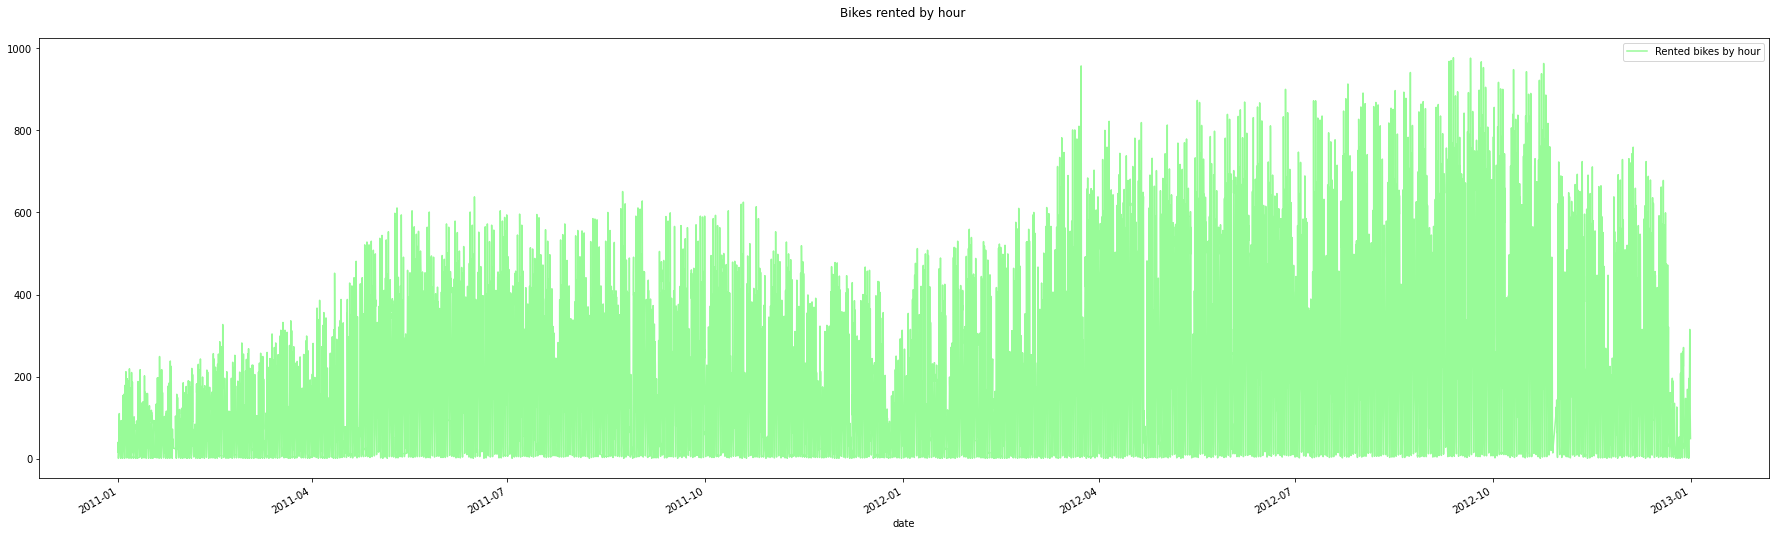

In [66]:
df_ts.plot(figsize = fig_size, title = 'Bikes rented by hour \n', color = 'palegreen', label = 'Rented bikes by hour', legend = True);

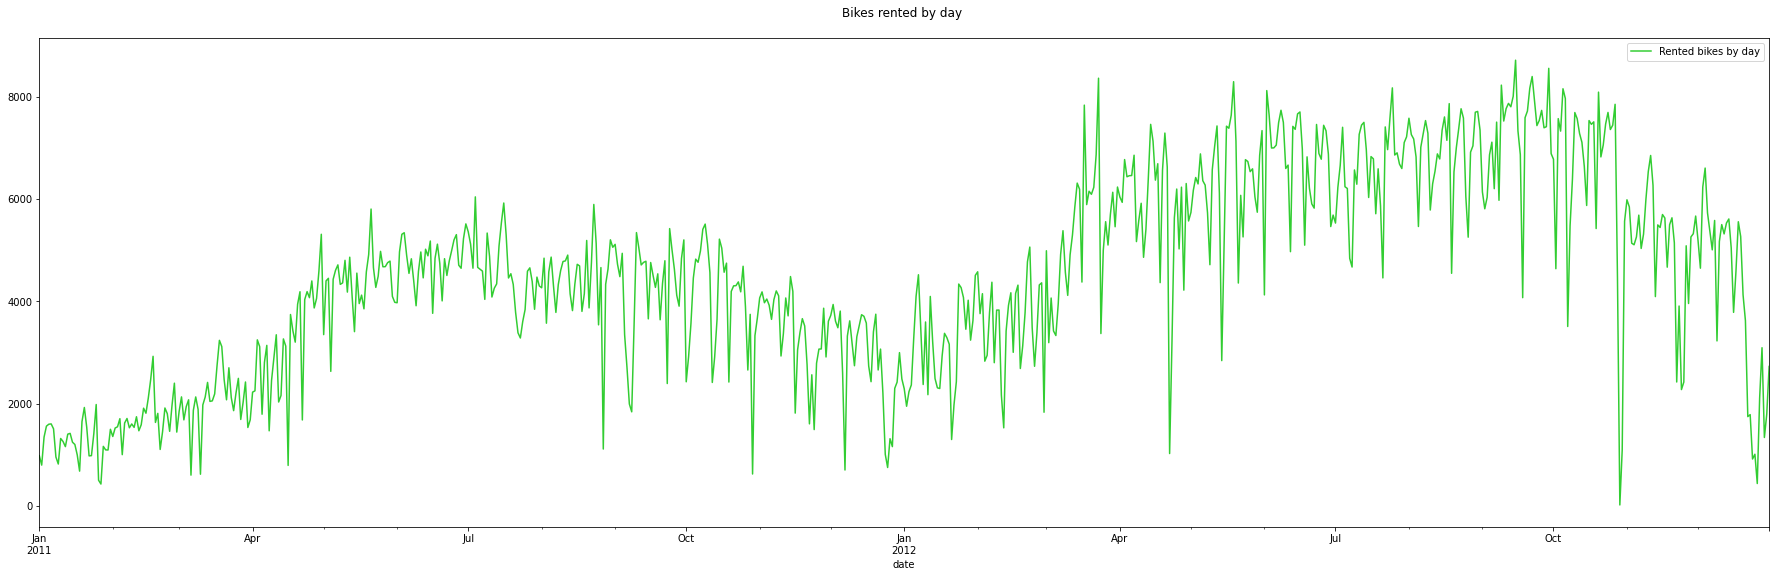

In [57]:
df_ts.resample('d').sum().plot(figsize = fig_size, title = 'Bikes rented by day \n', color = 'limegreen', label = 'Rented bikes by day', legend = True);

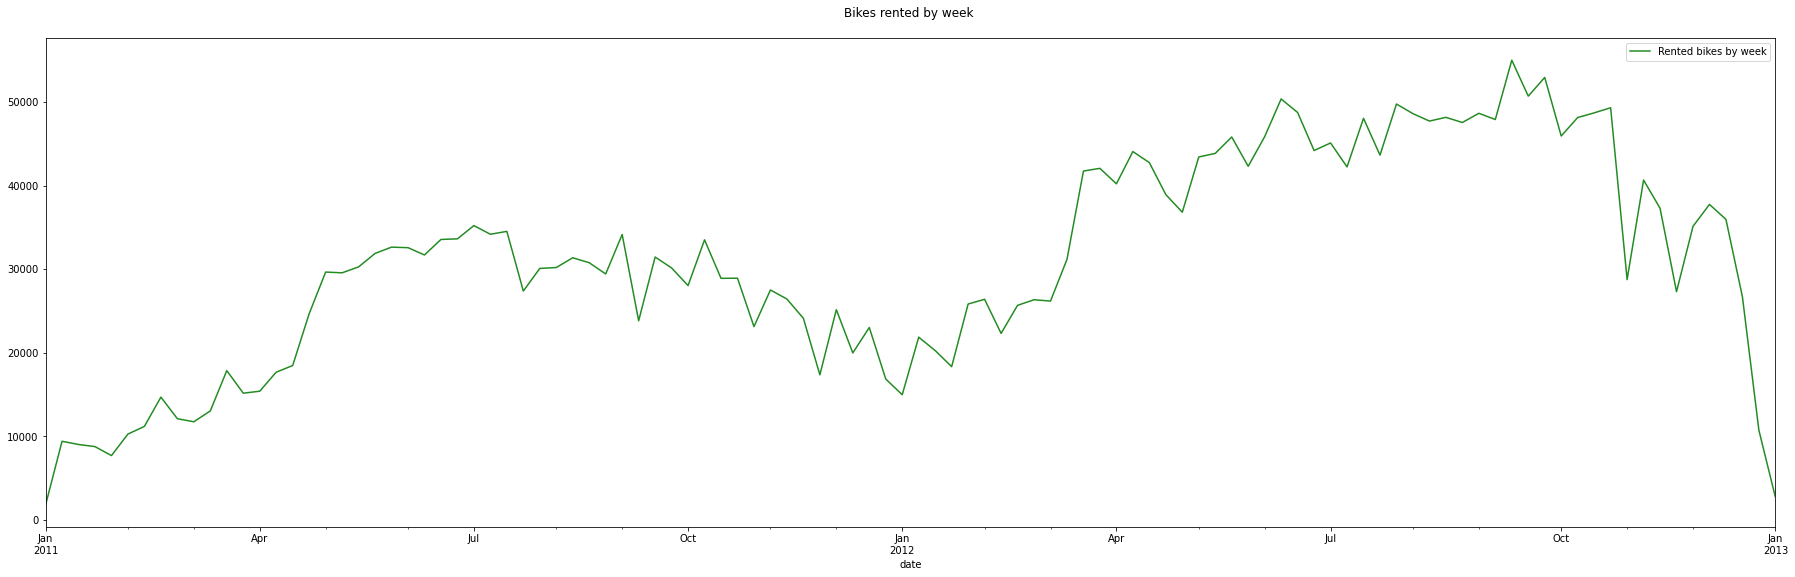

In [56]:
df_ts.resample('w').sum().plot(figsize = fig_size, title = 'Bikes rented by week \n', color = 'forestgreen', label = 'Rented bikes by week', legend = True);

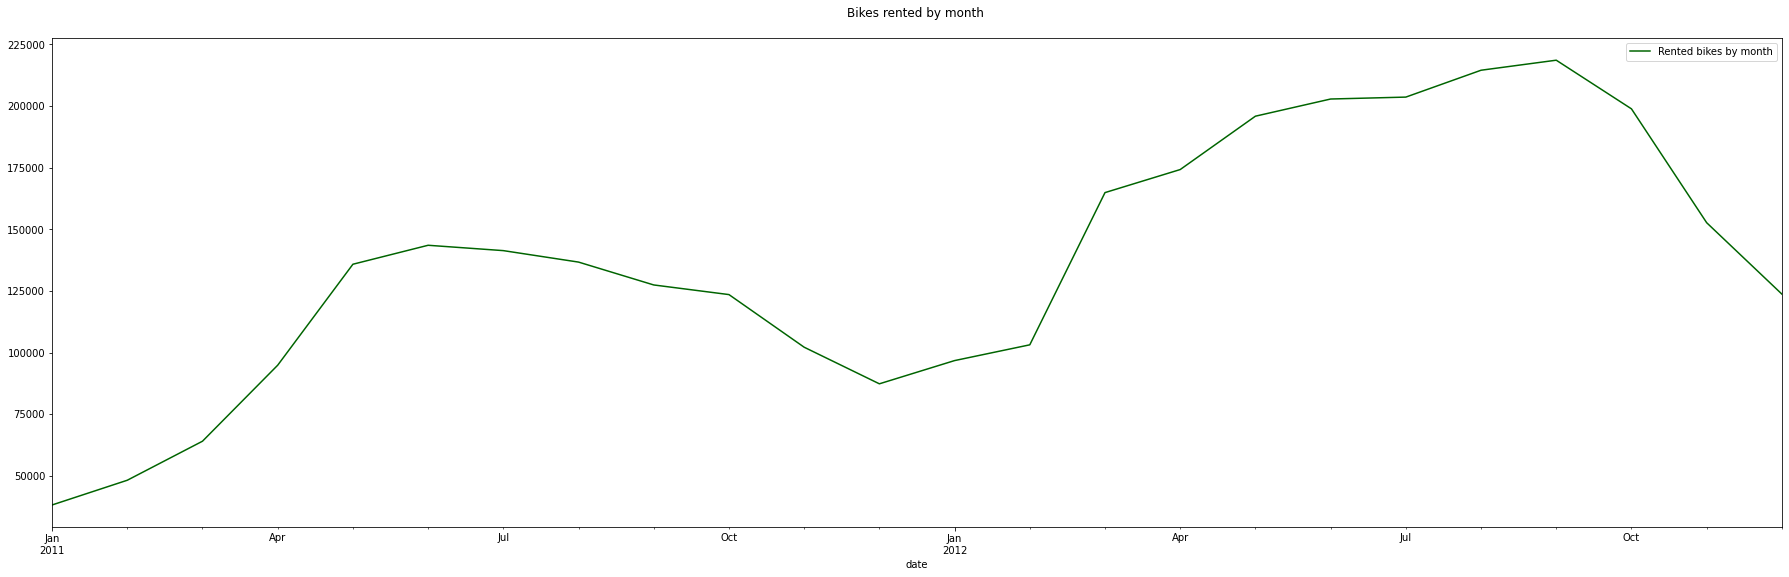

In [61]:
df_ts.resample('m').sum().plot(figsize = fig_size, title = 'Bikes rented by Month \n', color = 'darkgreen', label = 'Rented bikes by month', legend = True);

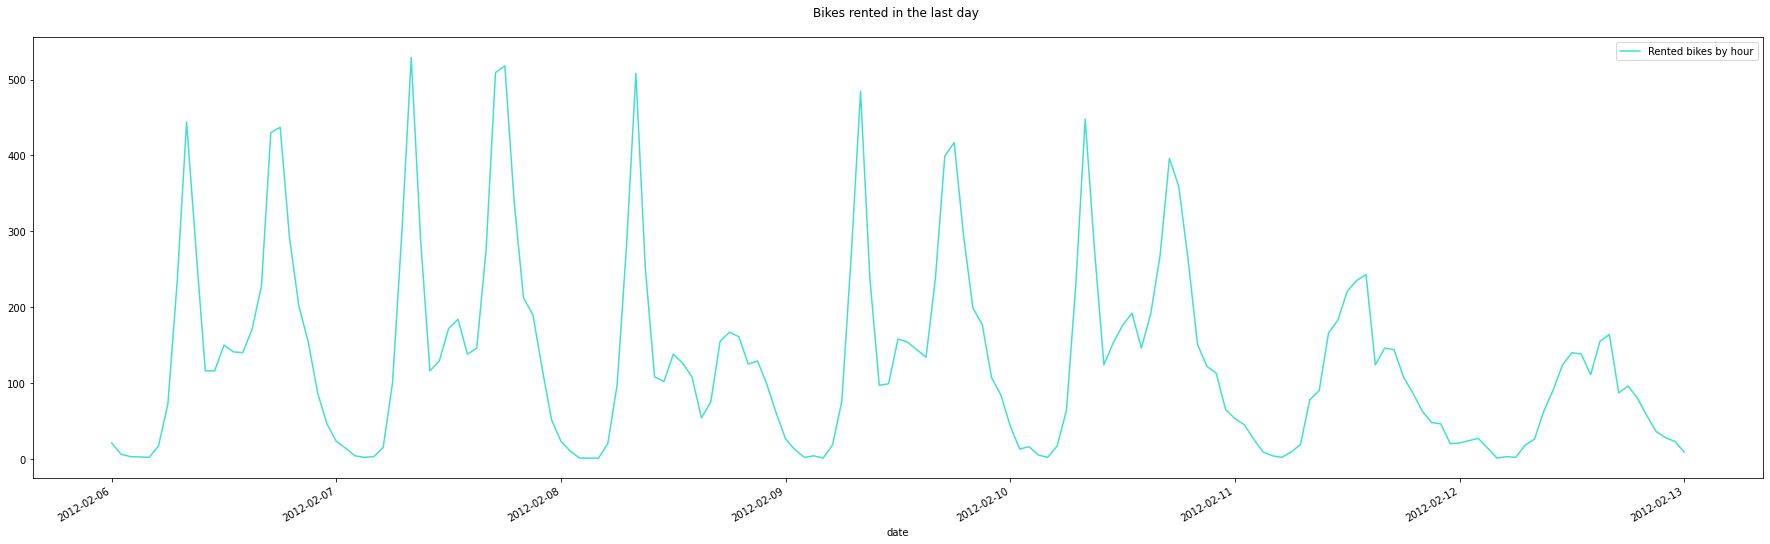

In [95]:
df_ts['2012-02-06 00:00:00':'2012-02-13 00:00:00'].plot(figsize = fig_size, title = 'Bikes rented in a week \n', color = 'turquoise', label = 'Rented bikes by hour', legend = True);

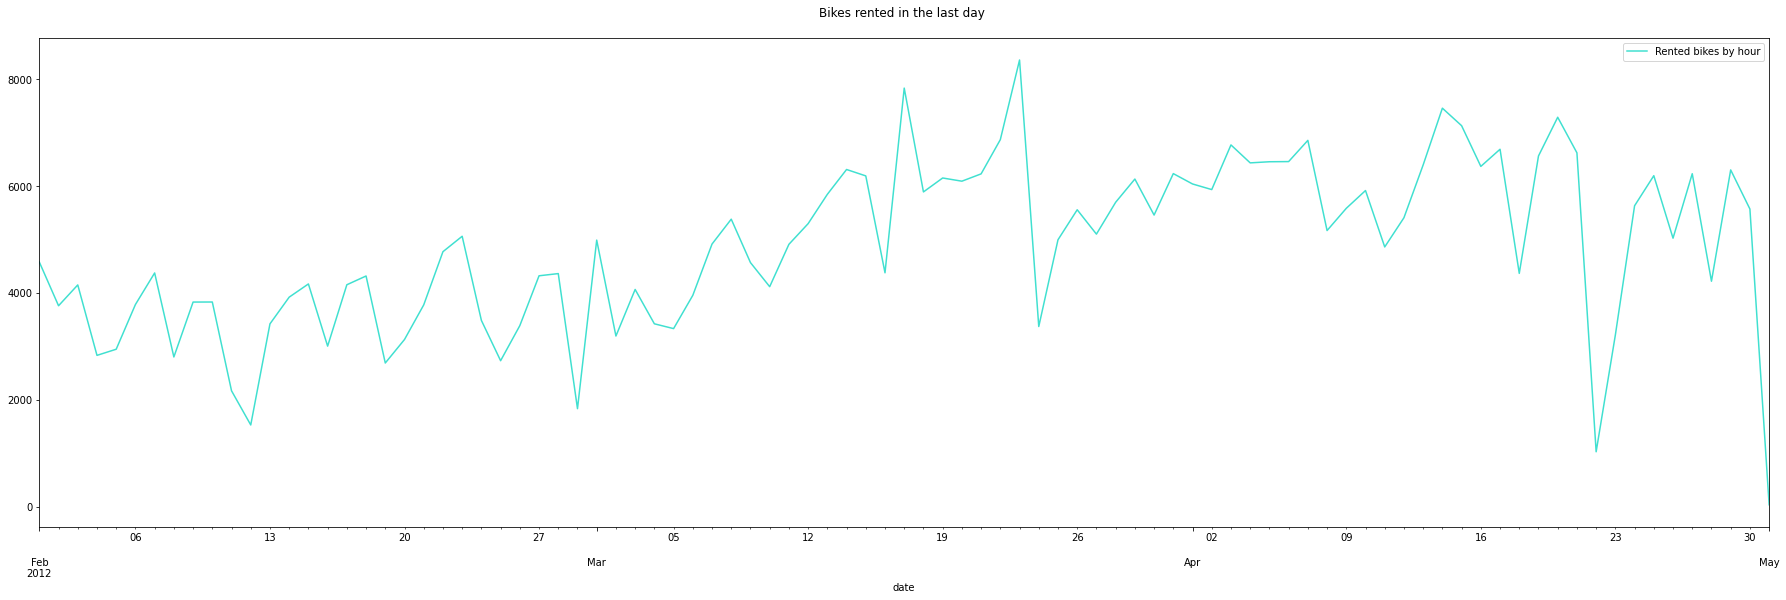

In [96]:
df_ts['2012-02-01 00:00:00':'2012-05-01 00:00:00'].resample('d').sum().plot(figsize = fig_size, title = 'Bikes rented in three months \n', color = 'turquoise', label = 'Rented bikes by day', legend = True);